<a href="https://colab.research.google.com/github/priyadarshinivr19/Minors-Degree-Machine-Learning/blob/main/FMML_M3L2_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implementing KNN from scratch and visualize Algorithm performance**

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from collections import Counter

In [3]:
def predict(X_train, y_train, X_test, k):
    distances = []
    targets = []

    for i in range(len(X_train)):
        # compute and store L2 distance
        distances.append([np.sqrt(np.sum(np.square(X_test - X_train[i, :]))), i])

    distances = sorted(distances)

    for i in range(k):
        index = distances[i][1]
        targets.append(y_train[index])

    # return most common target
    return Counter(targets).most_common(1)[0][0]

In [4]:
def k_nearest_neighbor(X_train, y_train, X_test, k):

    assert k <= len(X_train), "[!] K cannot be larger than number of samples."

    # loop over all observations
    predictions = []
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))

    return np.asarray(predictions)

In [5]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

In [6]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

In [7]:
from sklearn.datasets import load_iris

data = load_iris()

df = pd.DataFrame(data=data.data, columns=data.feature_names)

df["target"] = data.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
X = np.array(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
y = np.array(df['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)

In [9]:
# Making our predictions
predictions = k_nearest_neighbor(X_train, y_train, X_test, 7)

# evaluating accuracy
accuracy = Accuracy(y_test, predictions)
print("The accuracy of our classifier is {} %".format(100*accuracy))

The accuracy of our classifier is 94.0 %


In [10]:
from sklearn.neighbors import KNeighborsClassifier

sklearn_knn = KNeighborsClassifier(n_neighbors=7)
sklearn_knn.fit(X_train,y_train)
sklearn_predictions = sklearn_knn.predict(X_test)
accuracy = accuracy_score(y_test, sklearn_predictions)
print("The accuracy of Sklearn classifier is {} %".format(100*accuracy))

The accuracy of Sklearn classifier is 94.0 %


**Weighted KNN**

Task 1

In [11]:
import numpy as np
from collections import Counter

def predict(X_train, y_train, X_test, k):
    distances = []

    for i in range(len(X_train)):
        # compute and store L2 distance
        distance = np.sqrt(np.sum(np.square(X_test - X_train[i, :])))
        distances.append((distance, y_train[i]))

    # sort distances
    distances = sorted(distances, key=lambda x: x[0])

    # return the k-nearest neighbors along with their distances
    return distances[:k]

def k_nearest_neighbors(X_train, y_train, X_test, k):
    assert k <= len(X_train), "[!] K cannot be larger than number of samples."

    # loop over all observations
    all_neighbors = []
    for i in range(len(X_test)):
        neighbors = predict(X_train, y_train, X_test[i, :], k)
        all_neighbors.append(neighbors)

    return all_neighbors


In [12]:
# Making our predictions
predictions = k_nearest_neighbor(X_train, y_train, X_test, 7)

In [13]:
print(predictions)

[[[0.34641016 0.        ]
  [0.38729833 0.        ]
  [0.41231056 0.        ]
  [0.45825757 0.        ]
  [0.45825757 0.        ]
  [0.46904158 0.        ]
  [0.47958315 0.        ]]

 [[0.2        1.        ]
  [0.24494897 1.        ]
  [0.33166248 1.        ]
  [0.43588989 2.        ]
  [0.48989795 1.        ]
  [0.5        1.        ]
  [0.51961524 1.        ]]

 [[0.24494897 2.        ]
  [0.36055513 2.        ]
  [0.36055513 2.        ]
  [0.37416574 2.        ]
  [0.42426407 2.        ]
  [0.57445626 2.        ]
  [0.57445626 2.        ]]

 [[0.17320508 1.        ]
  [0.2236068  1.        ]
  [0.26457513 1.        ]
  [0.36055513 1.        ]
  [0.42426407 1.        ]
  [0.51961524 1.        ]
  [0.55677644 1.        ]]

 [[0.17320508 2.        ]
  [0.28284271 2.        ]
  [0.38729833 2.        ]
  [0.42426407 1.        ]
  [0.43588989 1.        ]
  [0.4472136  1.        ]
  [0.46904158 1.        ]]

 [[0.14142136 2.        ]
  [0.36055513 2.        ]
  [0.42426407 1.        ]
  

**Visualizing Data**

Voronoi Diagram

In [14]:
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.

    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.

    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.

    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

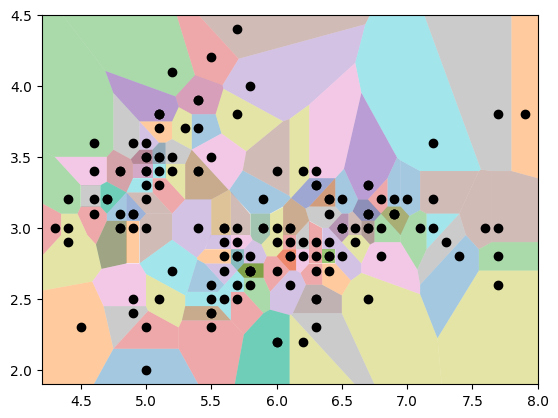

In [15]:
## Plotting Voronoi regions for the Iris dataset

points = []
xpts = np.array(df['sepal length (cm)'])
ypts = np.array(df['sepal width (cm)'])
for i in range(len(xpts)):
  points.append([xpts[i],ypts[i]])
# print(points)
points = np.array(points)
# compute Voronoi tesselation
vor = Voronoi(points)

regions, vertices = voronoi_finite_polygons_2d(vor)

for region in regions:
    polygon = vertices[region]
    plt.fill(*zip(*polygon), alpha=0.4)

plt.plot(points[:,0], points[:,1], 'ko')
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)

plt.show()

Decision Boundary

In [16]:
from matplotlib.colors import ListedColormap
import seaborn as sns


def decision_boundary_plot(x_dec,y_dec,k):
  h = .02  # step size in the mesh

  # Create color maps
  n = len(set(y_dec))
  cmap_light = ListedColormap(['pink', 'green', 'cyan','yellow'][:n])
  cmap_bold = ['pink', 'darkgreen', 'blue','yellow'][:n]

  for weights in ['uniform', 'distance']:
      # we create an instance of Neighbours Classifier and fit the data.
      clf = KNeighborsClassifier(n_neighbors=k, weights=weights)
      clf.fit(x_dec, y_dec)

      # Plot the decision boundary. For that, we will assign a color to each
      # point in the mesh [x_min, x_max]x[y_min, y_max].
      x_min, x_max = x_dec[:, 0].min() - 1, x_dec[:, 0].max() + 1
      y_min, y_max = x_dec[:, 1].min() - 1, x_dec[:, 1].max() + 1
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                          np.arange(y_min, y_max, h))
      Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

      # Put the result into a color plot
      Z = Z.reshape(xx.shape)
      plt.figure(figsize=(8, 6))
      plt.contourf(xx, yy, Z, cmap=cmap_light)

      # Plot also the training points
      sns.scatterplot(x=x_dec[:, 0], y=x_dec[:, 1], hue=y_dec,
                      palette=cmap_bold, alpha=1.0, edgecolor="black")
      plt.xlim(xx.min(), xx.max())
      plt.ylim(yy.min(), yy.max())
      plt.title("Multi-Classification (k = %i, weights = '%s')"% (k, weights))

  plt.show()


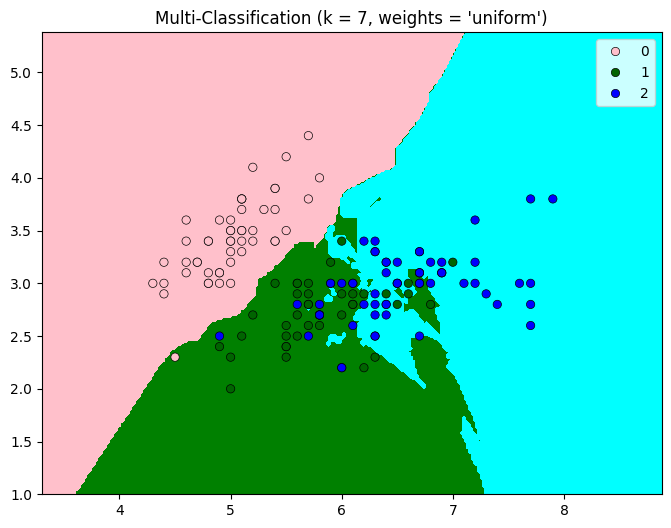

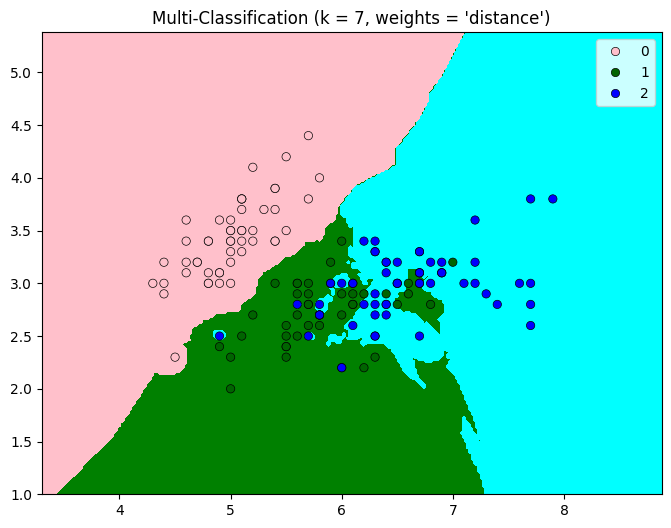

In [17]:
x_pts = X[:,:2]
y_pts = y
decision_boundary_plot(x_pts,y_pts,7)

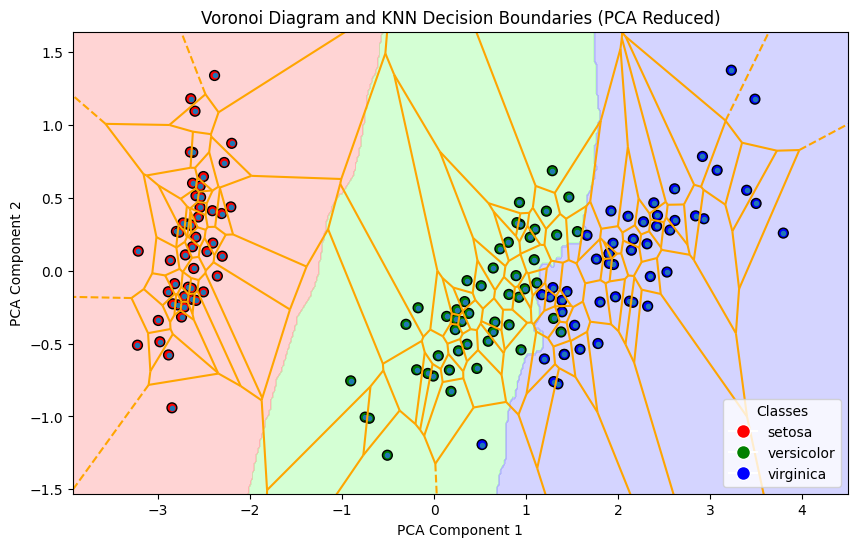

In [18]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib.colors import ListedColormap

# Load the iris dataset and create a DataFrame
data = load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df["target"] = data.target

# Apply PCA to reduce the dataset to two dimensions
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(df[data.feature_names])
y = df["target"]

# Plot the Voronoi diagram and decision boundaries
def plot_voronoi_decision_boundary(X, y, model, h=0.02):
    # Create a mesh grid for plotting decision boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict on the mesh grid to plot decision boundaries
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundaries
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']), alpha=0.5)

    # Plot Voronoi diagram
    vor = Voronoi(X)
    voronoi_plot_2d(vor, ax=plt.gca(), show_vertices=False, line_colors='orange', line_width=1.5)

    # Scatter plot for the dataset points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['red', 'green', 'blue']), edgecolor='k', s=50)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.title("Voronoi Diagram and KNN Decision Boundaries (PCA Reduced)")

    # Define custom legend for each target class
    colors = ['red', 'green', 'blue']
    target_names = data.target_names
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=target_names[i]) for i in range(len(target_names))]
    plt.legend(handles=legend_elements, title="Classes")

    plt.show()

# Fit the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_reduced, y)

# Plot Voronoi and Decision Boundaries
plot_voronoi_decision_boundary(X_reduced, y, knn)


Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test set
predictions = knn.predict(X_test)

# Display confusion matrix as a DataFrame using crosstab
confusion_df = pd.crosstab(y_test, predictions, rownames=['True'], colnames=['Predicted'], margins=True)
print(confusion_df)


Predicted   0   1   2  All
True                      
0          19   0   0   19
1           0  13   0   13
2           0   0  13   13
All        19  13  13   45


Text(0.5, 23.52222222222222, 'Predicted label')

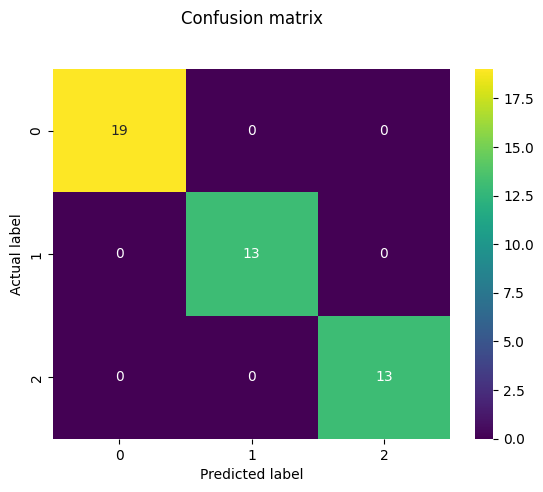

In [20]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, predictions)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Classification Report

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Car Evaluation

In [22]:
car_df = pd.read_csv('/content/drive/MyDrive/Machine Learning Minors/Originals/MODULE 3/car_evaluation.csv')
car_df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [23]:
for x in car_df.columns:
  # print(x)
  le = preprocessing.LabelEncoder()
  le.fit(car_df[x])
  car_df[x]=le.transform(car_df[x])

car_df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


In [24]:
dataset = car_df.values
X = dataset[:,0:6]
y = np.array(dataset[:,6])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [25]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
score = accuracy_score(y_test, predictions)
print("The accuracy of the classifier on Car evaluation dataset is {:.2f} %".format(100*score))

The accuracy of the classifier on Car evaluation dataset is 89.88 %


Task 3

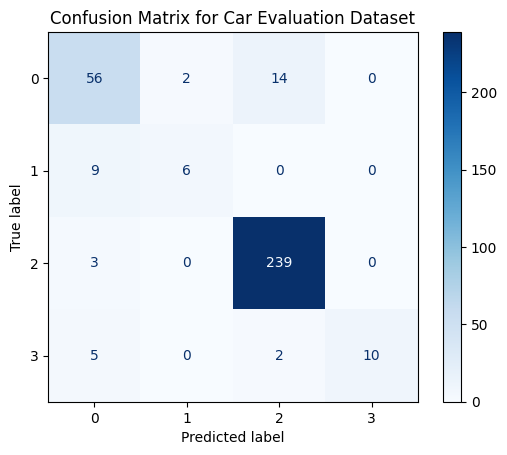

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Car Evaluation Dataset")
plt.show()

Task 4

In [28]:
from sklearn.metrics import classification_report

# Print the classification report
report = classification_report(y_test, predictions)
print("Classification Report for Car Evaluation Dataset:\n")
print(report)


Classification Report for Car Evaluation Dataset:

              precision    recall  f1-score   support

           0       0.77      0.78      0.77        72
           1       0.75      0.40      0.52        15
           2       0.94      0.99      0.96       242
           3       1.00      0.59      0.74        17

    accuracy                           0.90       346
   macro avg       0.86      0.69      0.75       346
weighted avg       0.90      0.90      0.89       346



Task 5

<Figure size 1000x600 with 0 Axes>

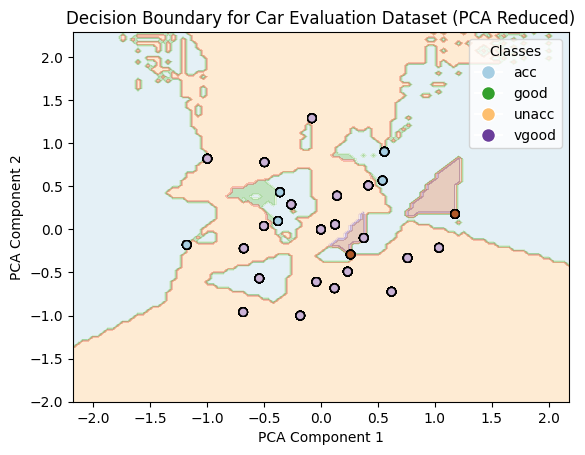

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import LabelEncoder
from matplotlib.lines import Line2D

# Load the Car Evaluation dataset
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Minors/Originals/MODULE 3/car_evaluation.csv')

# Separate features and target
X = df.iloc[:, :-1]  # Select all columns except the last as features
y = df.iloc[:, -1]   # Select the last column as the target

# Convert categorical features to dummy/indicator variables
X = pd.get_dummies(X)

# Encode the target labels as integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Reduce to two dimensions using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_encoded, test_size=0.3, random_state=42)

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Plot the decision boundary using DecisionBoundaryDisplay
plt.figure(figsize=(10, 6))
DecisionBoundaryDisplay.from_estimator(
    knn,
    X_train,
    response_method="predict",
    cmap=plt.cm.Paired,
    alpha=0.3
)

# Overlay the training points
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor="k", cmap=plt.cm.Paired)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Decision Boundary for Car Evaluation Dataset (PCA Reduced)")

# Create a custom legend
unique_labels = np.unique(y_train)
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.Paired(i / len(unique_labels)), markersize=10, label=label_encoder.inverse_transform([i])[0]) for i in unique_labels]
plt.legend(handles=legend_elements, title="Classes")

plt.show()


Task 6

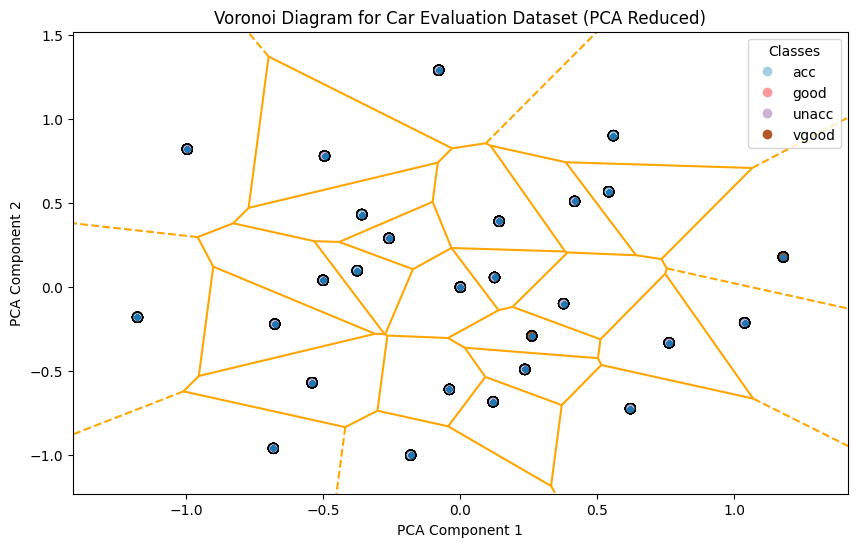

In [38]:
from scipy.spatial import Voronoi, voronoi_plot_2d


# Load the Car Evaluation dataset
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Minors/Originals/MODULE 3/car_evaluation.csv')

# Separate features and target
X = df.iloc[:, :-1]  # Select all columns except the last as features
y = df.iloc[:, -1]   # Select the last column as the target

# Convert categorical features to dummy/indicator variables
X = pd.get_dummies(X)

# Encode the target labels as integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Reduce to two dimensions using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_encoded, test_size=0.3, random_state=42)

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Plot the Voronoi diagram
def plot_voronoi(X, y, model):
    # Fit Voronoi on the reduced 2D points
    vor = Voronoi(X)

    # Plot Voronoi diagram
    plt.figure(figsize=(10, 6))
    voronoi_plot_2d(vor, ax=plt.gca(), show_vertices=False, line_colors='orange', line_width=1.5)

    # Scatter plot of the points with colors based on their classification
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolor="k", s=50)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.title("Voronoi Diagram for Car Evaluation Dataset (PCA Reduced)")

    # Custom legend with original class labels
    unique_labels = np.unique(y)
    legend_labels = [label_encoder.inverse_transform([i])[0] for i in unique_labels]
    handles = scatter.legend_elements()[0]
    plt.legend(handles=handles, labels=legend_labels, title="Classes")

    plt.show()

# Plot the Voronoi diagram with the classifier's training data
plot_voronoi(X_train, y_train, knn)


**Questions**

**1. In the section on Decision boundaries, you must have seen that we ran the KNN algorithm twice: first with the weights set to 'uniform' and then set to 'distance'. Find out the difference between these two.**

1. weights='uniform': Each neighbor contributes equally to the prediction, regardless of its distance from the query point. The algorithm simply counts the number of neighbors belonging to each class, and the class with the most neighbors is selected.

Use Case: This setting is useful when the neighbors are equally relevant to the prediction, perhaps when data points are evenly distributed across the feature space.

2. weights='distance': Closer neighbors have more influence on the prediction than farther ones. This is useful in situations where closer neighbors are more likely to have similar labels to the query point, as it reduces the influence of distant (and possibly irrelevant) points.

Use Case: This setting is effective in cases with density variations or clusters, where closer neighbors better represent the query point.

**2. What do you think could be the drawbacks of using KNN ?**

Computational Cost: KNN has a high computational cost, especially for large datasets, because it calculates the distance from each query point to all training points, making it slow and resource-intensive.

Storage Requirements: KNN requires storing the entire training set, which can be memory-intensive for large datasets.

Sensitivity to Irrelevant Features: KNN is sensitive to irrelevant features and noise, as it relies on distance metrics. Without proper feature selection or scaling, irrelevant features can distort distances.

Dimensionality: As the number of features increases, the distance metric becomes less effective, and data points become uniformly distant from each other, reducing the algorithm's effectiveness.

Class Imbalance: In datasets with imbalanced classes, KNN can be biased towards the majority class, as it simply counts neighbors without any weighting for class balance.